# Background | Part 1 (EDA of Auser Data Set)
The [Acea Group](https://www.gruppo.acea.it/en) is one of the leading Italian multiutility operators. Listed on the Italian Stock Exchange since 1999, the company manages and develops water and electricity networks and environmental services. Acea is the foremost Italian operator in the water services sector supplying 9 million inhabitants in Lazio, Tuscany, Umbria, Molise, Campania.

# Evaluation 
This is an analysis using four data sets from the Analytics Competition in Kaggle for the Acea Group.

In [1]:
#pip install matplotlib


# 1. Packages

In [2]:
# Base 
# -----------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Missing Value
# -----------------------------------
#!pip install missingno
import missingno as msno

# Configuration
# -----------------------------------
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

from termcolor import colored

# 2. Load Data 

In [51]:
# Import
aq_auser = pd.read_csv("Data/Aquifer_Auser.csv")
aq_doganella = pd.read_csv("Data/Aquifer_Doganella.csv")
aq_luco = pd.read_csv("Data/Aquifer_Luco.csv")
aq_petrignago = pd.read_csv("Data/Aquifer_Petrignano.csv")

#lakeBilancino = pd.read_csv("Data/Lake_Bilancino.csv")
#riverArno = pd.read_csv("Data/River_Arno.csv")
#ws_Amiata = pd.read_csv("Data/Spring_Amiata.csv")
#ws_Lupa = pd.read_csv("Data/Spring_Lupa.csv")
#ws_Madonna = pd.read_csv("Data/Spring_Madonna_di_Canneto.csv")

print("All files uploade successfully.")
print(aq_auser.shape)

All files uploade successfully.
(8154, 27)


# 3. Visualize Data

In [52]:
# Convert 'Date' to datetime if not already
aq_auser["Date"] = pd.to_datetime(aq_auser['Date'], dayfirst=True)

# Ensure the DataFrame is sorted by 'Date' to maintain time series order
aq_auser = aq_auser.sort_values(by="Date").reset_index(drop=True)

# Identify columns that contain 'Depth'
depth_columns = [col for col in aq_auser.columns if 'Depth' in col]

# Find the first row where all 'Depth' columns are non-NaN
first_valid_index = aq_auser.dropna(subset=depth_columns, how='any').index.min()

# Drop all rows above the identified row
aq_auser = aq_auser.loc[first_valid_index:].reset_index(drop=True)

# Display the first few rows to verify the changes
aq_auser.head(2)

Date  Rainfall_Gallicano  Rainfall_Pontetetto  Rainfall_Monte_Serra  \
0 2011-05-17                0.00                 0.00                  0.00   
1 2011-05-18                0.00                 0.00                  0.00   

   Rainfall_Orentano  Rainfall_Borgo_a_Mozzano  Rainfall_Piaggione  \
0               0.00                      0.00                0.00   
1               0.00                      0.00                0.00   

   Rainfall_Calavorno  Rainfall_Croce_Arcana  \
0                0.00                   0.00   
1                0.00                   0.00   

   Rainfall_Tereglio_Coreglia_Antelminelli  Rainfall_Fabbriche_di_Vallico  \
0                                     0.00                           0.00   
1                                     0.00                           0.00   

   Depth_to_Groundwater_LT2  Depth_to_Groundwater_SAL  \
0                    -12.97                     -5.92   
1                    -12.93                     -5.93   

   Depth_to_Groundwater_PAG  Depth_to_Groundwater_CoS  \
0                     -2.34                     -6.22   
1                     -2.46                     -6.27   

   Depth_to_Groundwater_DIEC  Temperature_Orentano  Temperature_Monte_Serra  \
0                      -3.79                 16.05                    12.80   
1                      -3.80                 17.20                    15.25   

   Temperature_Ponte_a_Moriano  Temperature_Lucca_Orto_Botanico  Volume_POL  \
0                        17.20                            17.45    -9936.00   
1                        19.00                            19.00    -9936.00   

   Volume_CC1  Volume_CC2  Volume_CSA  Volume_CSAL  \
0   -16377.12   -12823.49        0.00         0.00   
1   -16377.12   -12823.49        0.00         0.00   

   Hydrometry_Monte_S_Quirico  Hydrometry_Piaggione  
0                        0.17                 -1.04  
1                        0.18                 -1.04

In [6]:
# List missing values within each column
aq_auser.isna().sum()

Date                                         0
Rainfall_Gallicano                           0
Rainfall_Pontetetto                          0
Rainfall_Monte_Serra                         6
Rainfall_Orentano                            0
Rainfall_Borgo_a_Mozzano                     0
Rainfall_Piaggione                           0
Rainfall_Calavorno                           0
Rainfall_Croce_Arcana                        0
Rainfall_Tereglio_Coreglia_Antelminelli      0
Rainfall_Fabbriche_di_Vallico                0
Depth_to_Groundwater_LT2                   381
Depth_to_Groundwater_SAL                   128
Depth_to_Groundwater_PAG                   391
Depth_to_Groundwater_CoS                   398
Depth_to_Groundwater_DIEC                  195
Temperature_Orentano                         0
Temperature_Monte_Serra                      0
Temperature_Ponte_a_Moriano                  0
Temperature_Lucca_Orto_Botanico              0
Volume_POL                                   0
Volume_CC1   

#### 3.1 Extract Targets that are non-NaN Values

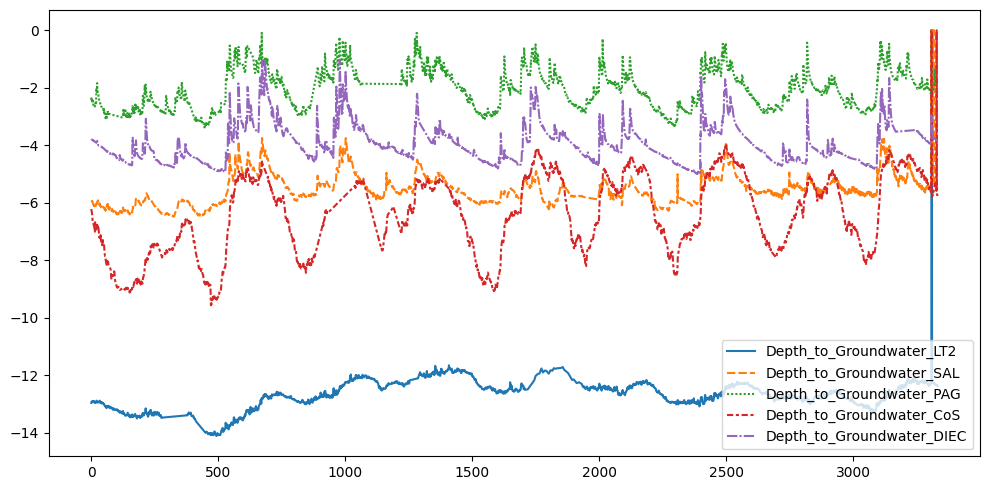

In [7]:
# Filter columns that contain 'Depth' in their names
depth_columns = [col for col in aq_auser.columns if 'Depth' in col]
depth_to_ground = aq_auser[depth_columns]

#Visualize Target variables
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = depth_to_ground)
plt.tight_layout()
plt.legend(loc="lower right")  # This positions the legend in the lower right corner
plt.legend(loc="lower right")  # This positions the legend in the lower right corner
plt.show()

In [8]:
aq_auser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Date                                     3333 non-null   datetime64[ns]
 1   Rainfall_Gallicano                       3333 non-null   float64       
 2   Rainfall_Pontetetto                      3333 non-null   float64       
 3   Rainfall_Monte_Serra                     3327 non-null   float64       
 4   Rainfall_Orentano                        3333 non-null   float64       
 5   Rainfall_Borgo_a_Mozzano                 3333 non-null   float64       
 6   Rainfall_Piaggione                       3333 non-null   float64       
 7   Rainfall_Calavorno                       3333 non-null   float64       
 8   Rainfall_Croce_Arcana                    3333 non-null   float64       
 9   Rainfall_Tereglio_Coreglia_Antelminelli  

# 4. Clean Data Set (initial)

### 4.1 Handling Missing Values for feature columns.

Missing values are handled at each column level using Linear Interopolation.

In [9]:
# Set 'Date' as the index
aq_auser.set_index('Date', inplace=True)

# Apply linear interpolation to all columns, assuming other columns are of float64 type. This will automatically skip the 'Date' column 
aq_auser.interpolate(method='linear', limit_direction='both', inplace=True)

# Note: 'limit_direction='both'' is included to demonstrate control over interpolation direction, with out interpolating edge cases

In [10]:
aq_auser.describe()

Rainfall_Gallicano  Rainfall_Pontetetto  Rainfall_Monte_Serra  \
count             3333.00              3333.00               3333.00   
mean                 5.00                 3.55                  3.89   
std                 15.08                10.26                 10.87   
min                  0.00                 0.00                  0.00   
25%                  0.00                 0.00                  0.00   
50%                  0.00                 0.00                  0.00   
75%                  2.00                 1.00                  1.40   
max                318.80               146.60                152.20   

       Rainfall_Orentano  Rainfall_Borgo_a_Mozzano  Rainfall_Piaggione  \
count            3333.00                   3333.00             3333.00   
mean                3.16                      4.80                4.07   
std                 8.85                     13.76               11.23   
min                 0.00                      0.00                0.00   
25%                 0.00                      0.00                0.00   
50%                 0.00                      0.00                0.00   
75%                 1.00                      1.80                1.40   
max               108.80                    176.60              123.80   

       Rainfall_Calavorno  Rainfall_Croce_Arcana  \
count             3333.00                3333.00   
mean                 4.63                   3.06   
std                 12.80                  10.28   
min                  0.00                   0.00   
25%                  0.00                   0.00   
50%                  0.00                   0.00   
75%                  2.00                   1.40   
max                209.00                 285.00   

       Rainfall_Tereglio_Coreglia_Antelminelli  Rainfall_Fabbriche_di_Vallico  \
count                                  3333.00                        3333.00   
mean                                      4.21                           5.91   
std                                      11.24                          16.50   
min                                       0.00                           0.00   
25%                                       0.00                           0.00   
50%                                       0.00                           0.00   
75%                                       2.00                           2.80   
max                                     147.20                         197.00   

       Depth_to_Groundwater_LT2  Depth_to_Groundwater_SAL  \
count                   3333.00                   3333.00   
mean                     -12.67                     -5.53   
std                        0.60                      0.59   
min                      -14.12                     -6.48   
25%                      -12.95                     -5.90   
50%                      -12.64                     -5.61   
75%                      -12.30                     -5.26   
max                        0.00                      0.00   

       Depth_to_Groundwater_PAG  Depth_to_Groundwater_CoS  \
count                   3333.00                   3333.00   
mean                      -2.05                     -6.40   
std                        0.67                      1.36   
min                       -3.38                     -9.57   
25%                       -2.66                     -7.47   
50%                       -2.01                     -6.33   
75%                       -1.58                     -5.24   
max                       -0.09                      0.00   

       Depth_to_Groundwater_DIEC  Temperature_Orentano  \
count                    3333.00               3333.00   
mean                       -3.94                 15.34   
std                         0.66                  6.96   
min                        -4.99                 -2.25   
25%                        -4.44                  9.75   
50%                        -4.07            

### 4.2 Visualize all features and targets 

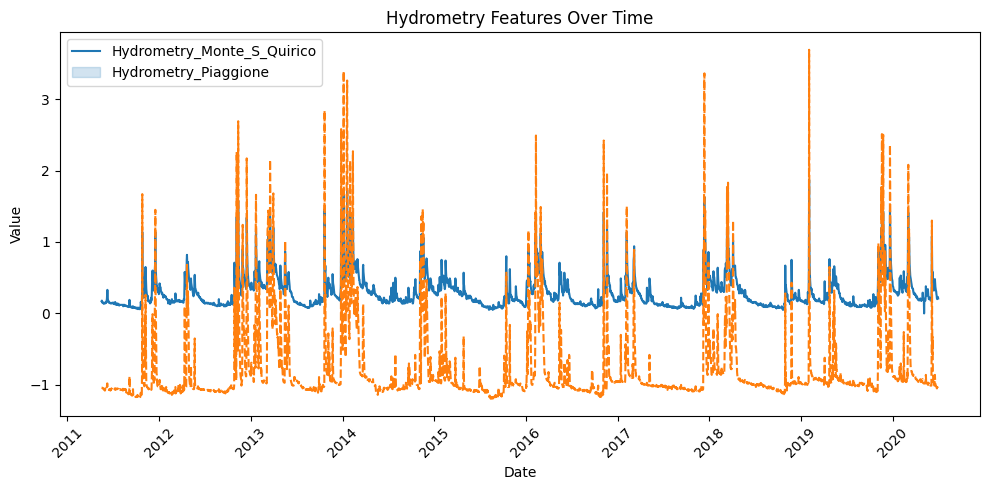

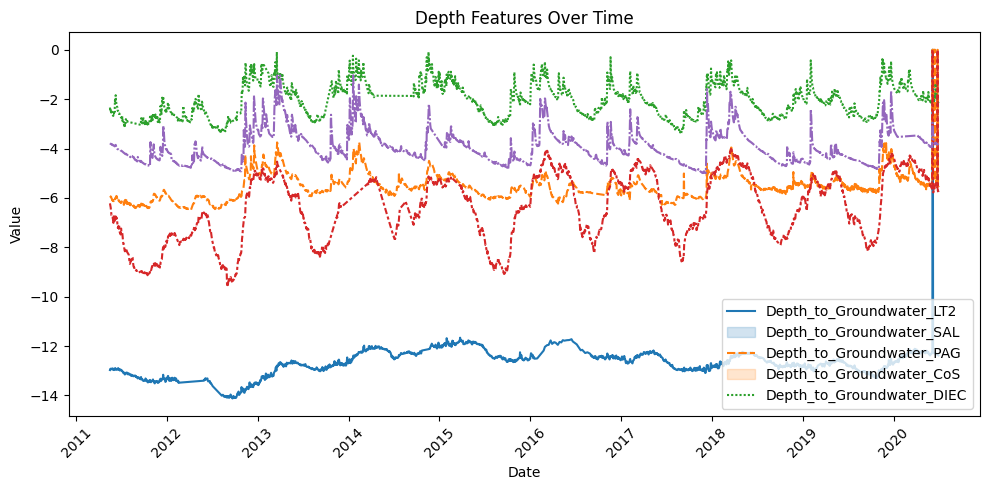

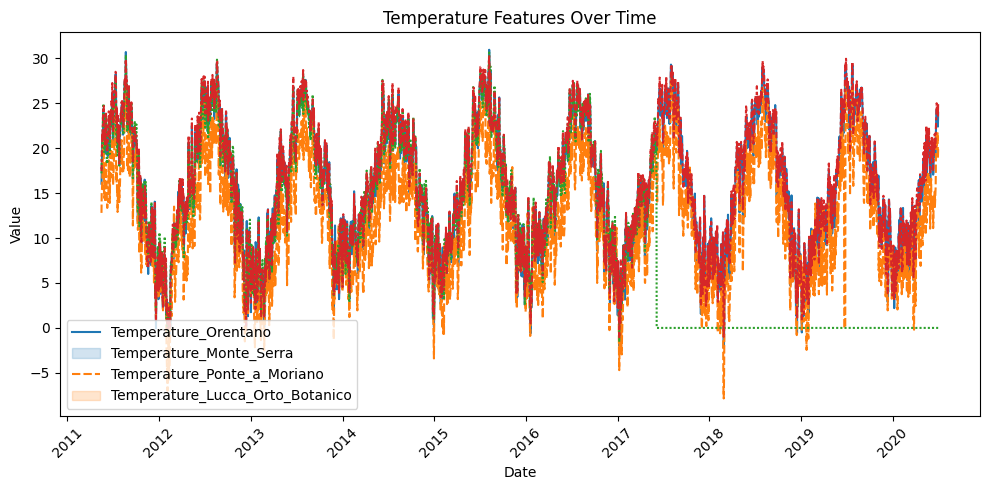

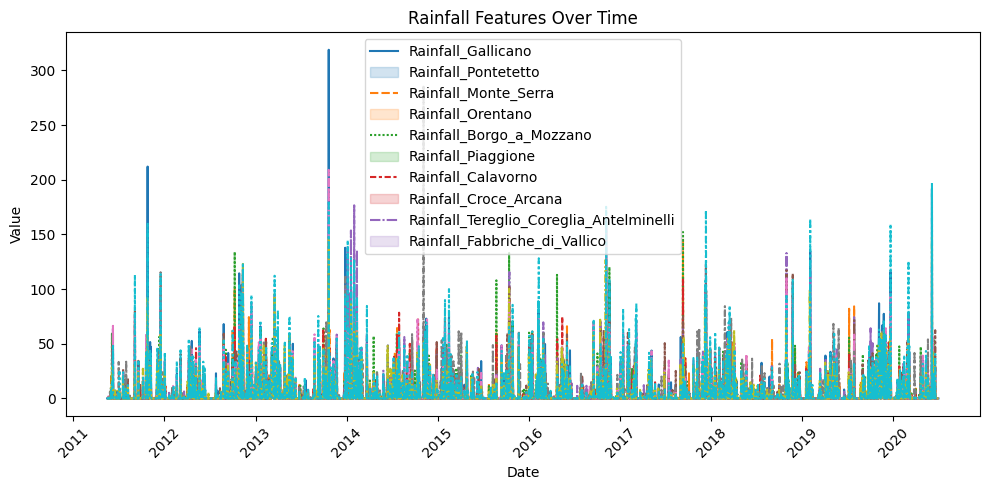

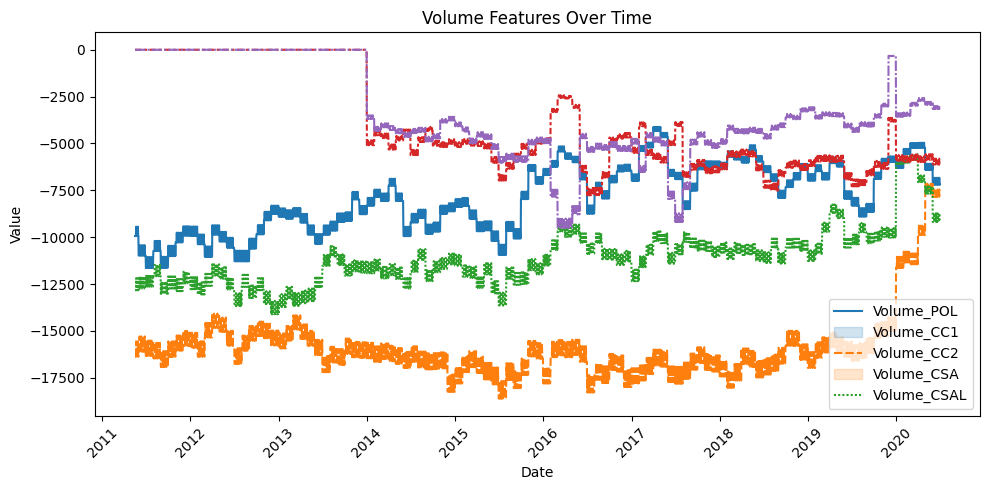

In [11]:
# Identify unique groups based on the first word before '_'
groups = set(col.split('_')[0] for col in aq_auser.columns if '_' in col)

# Plot each group in a separate figure
for group in groups:
    # Filter columns for the current group
    group_columns = [col for col in aq_auser.columns if col.startswith(group + '_')]
    group_data = aq_auser[group_columns]
    
    # Plotting
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=group_data)
    
    # Setting title and legend
    plt.title(f'{group} Features Over Time')
    plt.legend(group_columns, loc="best")  # Adjust legend location as needed
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.xticks(rotation=45)  # Rotate date labels for better readability
    plt.tight_layout()
    plt.show()


# 5. Correlation of Targets and Features 

## 5.1 Correlation of Target Variables

Text(0.5, 1.0, 'Correlation Matrix of Target Features')

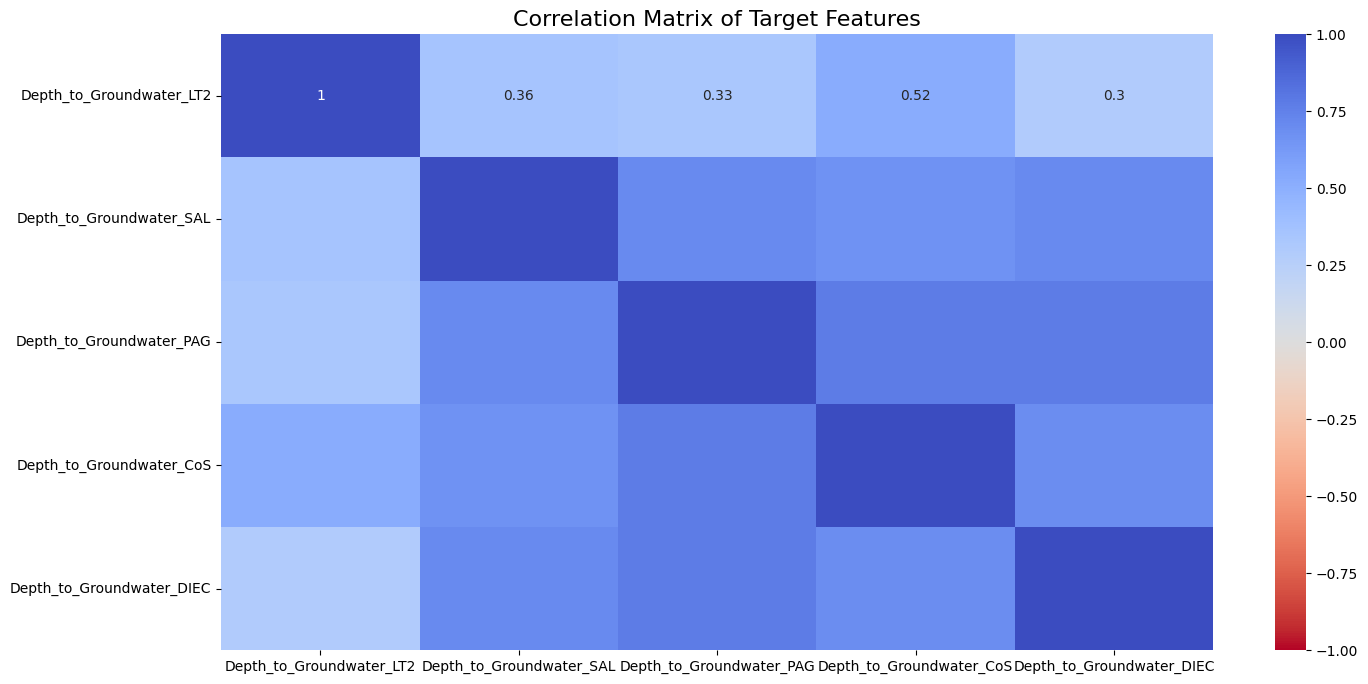

In [12]:
# Assuming aq_auser and core_columns are defined somewhere above this snippet.
core_columns = ['Depth']

# Select columns based on them containing the prefixes identified in 'core_columns'
selected_columns = [col for col in aq_auser.columns if any(col.startswith(prefix) for prefix in core_columns)]

f, ax = plt.subplots(figsize=(16, 8))  # Corrected for a single subplot

# Calculate correlation matrix for the selected columns
corrmat = aq_auser[selected_columns].corr()

# Plot the correlation matrix
sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax)
ax.set_title('Correlation Matrix of Target Features', fontsize=16)

### 5.1.1. Correlation of Lagged Features to Target Variable LT2

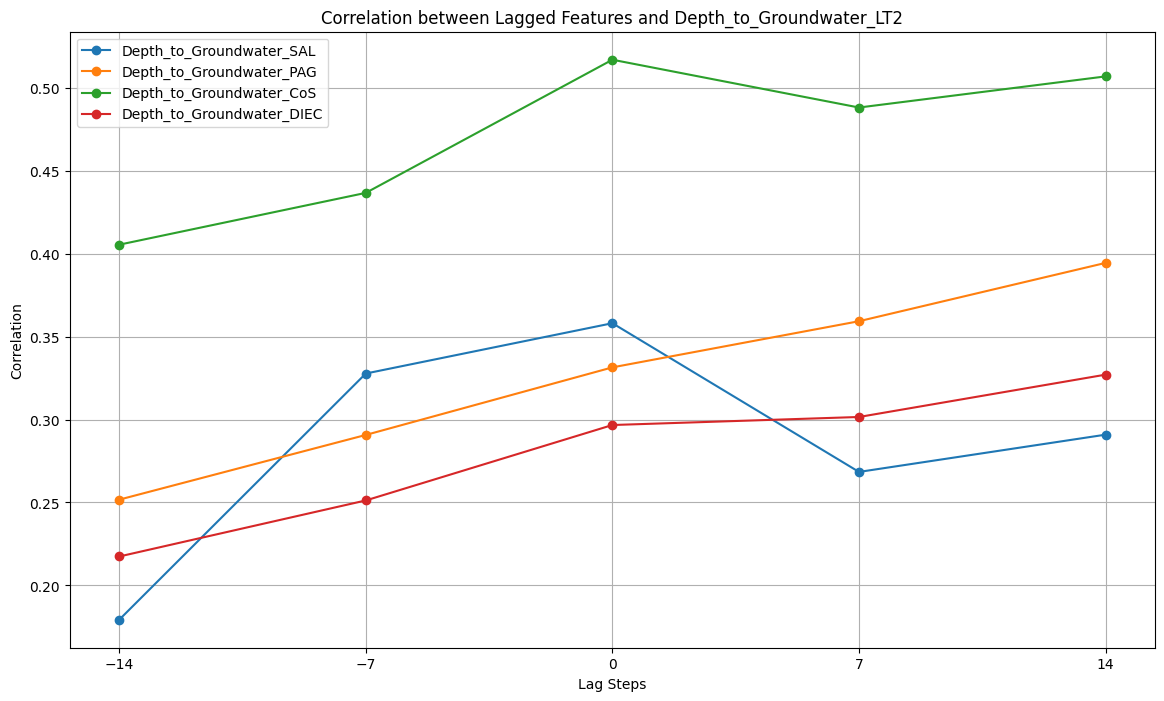

In [13]:
# Assuming aq_auser is your DataFrame and 'target_column' is your target
core_columns = ['Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG', 'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC']
num_lags = [-14, -7, 0, 7, 14]  # List of lag values to iterate through


def plot_lagged_correlations(dataframe, core_columns, target_column, num_lags):
    """
    Calculates and plots the correlation of lagged features against a target column.
    """
    # Dictionary to store correlation results for plotting
    correlation_results = {column: [] for column in core_columns}

    for column in core_columns:
        for lag in num_lags:
            # Creating a new lagged column for the current column and lag value
            lagged_column_name = f'{column}_lag_{lag}'
            dataframe[lagged_column_name] = dataframe[column].shift(lag)
            
            # Calculating correlation with the target feature
            correlation = dataframe[[lagged_column_name, target_column]].corr().iloc[0, 1]
            correlation_results[column].append((lag, correlation))

    # Plotting
    plt.figure(figsize=(14, 8))
    for column, correlations in correlation_results.items():
        lags, corrs = zip(*correlations)  # Unzipping the lag values and their corresponding correlations
        plt.plot(lags, corrs, marker='o', label=f'{column}')

    plt.title(f'Correlation between Lagged Features and {target_column}')
    plt.xlabel('Lag Steps')
    plt.ylabel('Correlation')
    plt.xticks(num_lags)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
# Assuming 'aq_auser' is your DataFrame and 'Depth_to_Groundwater_PAG' is your target column
plot_lagged_correlations(aq_auser, core_columns, 'Depth_to_Groundwater_LT2', num_lags)

#### It seems that all depth to groundwater measurements have the highest correlation to LT2 measurements at a 14 day lag.

### 5.1.2 Handling Outliers and Zero Values at tail end

In [14]:
# Assuming aq_auser is your DataFrame and it's already loaded
aq_auser['Depth_to_Groundwater_LT2_lag_-14'] = aq_auser['Depth_to_Groundwater_LT2'].shift(14)

In [15]:
# Specify the columns you want to keep
columns_to_keep = [
    'Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_PAG', 'Depth_to_Groundwater_CoS',
    'Depth_to_Groundwater_LT2_lag_-14'
]
# Create a new DataFrame by extracting the specified columns
new_aq_auser = aq_auser[columns_to_keep].copy()

# Display the new DataFrame
#print(new_aq_auser.head())

In [16]:
#aq_auser.head(2)

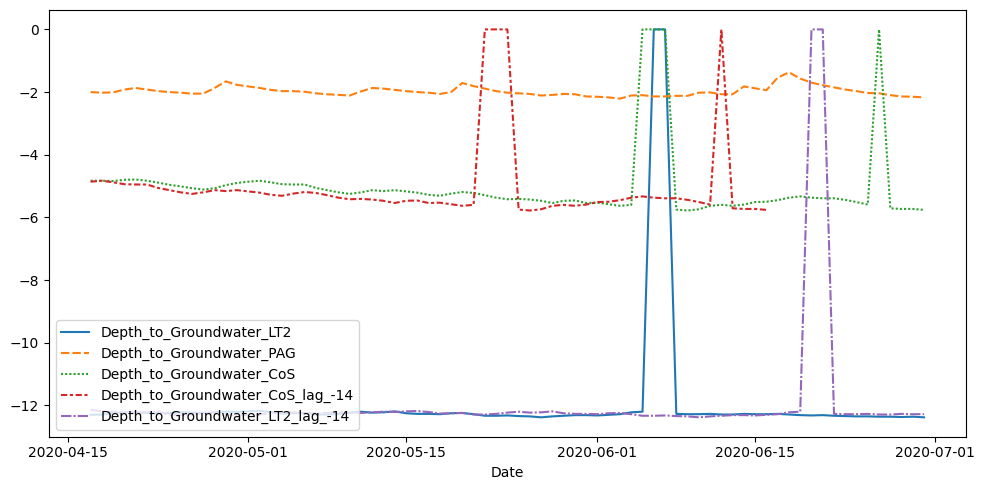

In [17]:
# Filter columns that contain 'Depth' in their names
depth_columns = ['Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_PAG', 'Depth_to_Groundwater_CoS',
    'Depth_to_Groundwater_CoS_lag_-14', 'Depth_to_Groundwater_LT2_lag_-14']
depth_ground = aq_auser[depth_columns].tail(75)  # Select only the last rows

#Visualize Target variables
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = depth_ground)
plt.tight_layout()
plt.legend(loc="lower left")  # This positions the legend in the lower right corner
plt.show()

In [18]:
# Assuming aq_auser is your DataFrame
# Step 1: Identify columns starting with 'Depth'
depth_columns = [col for col in aq_auser.columns if col.startswith('Depth')]

# Step 2 and 3: Select last 75 rows and replace 0 with NaN for interpolation
aq_auser_tail = aq_auser[-75:].copy()  # Work on a copy of the last 75 rows
aq_auser_tail[depth_columns] = aq_auser_tail[depth_columns].replace(0, np.nan)

# Step 4: Apply linear interpolation on these columns
aq_auser_tail_interpolated = aq_auser_tail.interpolate(method='linear', limit_direction='forward', axis=0)

# Step 5: Update the original DataFrame with interpolated values
aq_auser.update(aq_auser_tail_interpolated)

#### After researching options for imputation selected simple linear imputation.

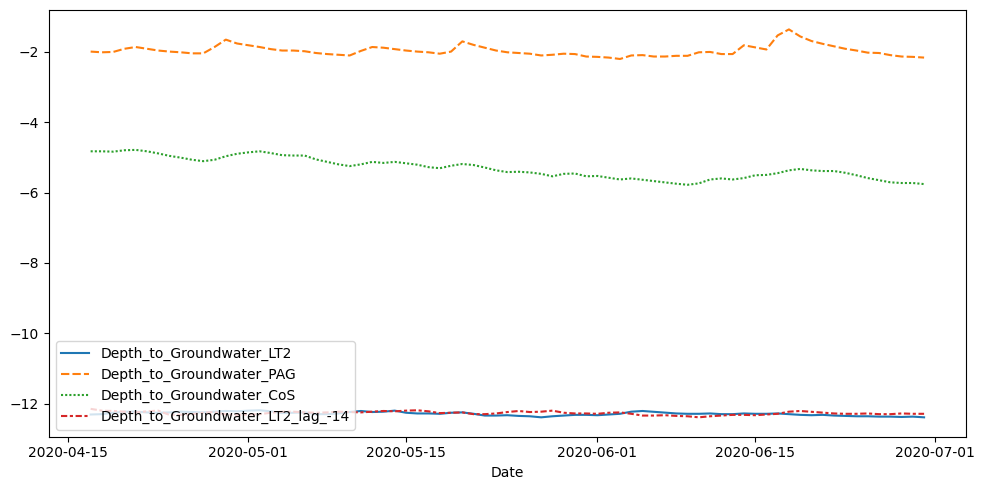

In [19]:
# Filter columns that contain 'Depth' in their names
depth_columns = ['Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_PAG', 'Depth_to_Groundwater_CoS',
                 'Depth_to_Groundwater_LT2_lag_-14']
depth_ground = aq_auser[depth_columns].tail(75)  # Select only the last 200 rows

#Visualize Target variables
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = depth_ground)
plt.tight_layout()
plt.legend(loc="lower left")  # This positions the legend in the lower right corner
plt.show()

### 5.1.3 Delete extra Columns with lags 

In [20]:
#aq_auser.columns

In [21]:
#clean up columns 
target_column = ['_lag_0', '_lag_-7', '_lag_7', '_lag_14', '_SAL_lag_-14', '_DIEC_lag_-14', '_CoS_lag_-14', '_PAG_lag_-14' ] 

# Identify columns to drop by checking if their names end with any value in target_column
columns_to_drop = [col for col in aq_auser.columns if any(col.endswith(suffix) for suffix in target_column)]

# Drop these columns from the DataFrame
aq_auser.drop(columns=columns_to_drop, inplace=True)

#check task
aq_auser.columns

Index(['Rainfall_Gallicano', 'Rainfall_Pontetetto', 'Rainfall_Monte_Serra',
       'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano', 'Rainfall_Piaggione',
       'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico', 'Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione',
       'Depth_to_Groundwater_LT2_lag_-14'],
      dtype='object')

In [22]:
#aq_auser.isna().sum()

## 5.2 Correlation of Target Variables vs Feature in Group - Rainfall 

Text(0.5, 1.0, 'Correlation Matrix of Targets to Rainfall Features')

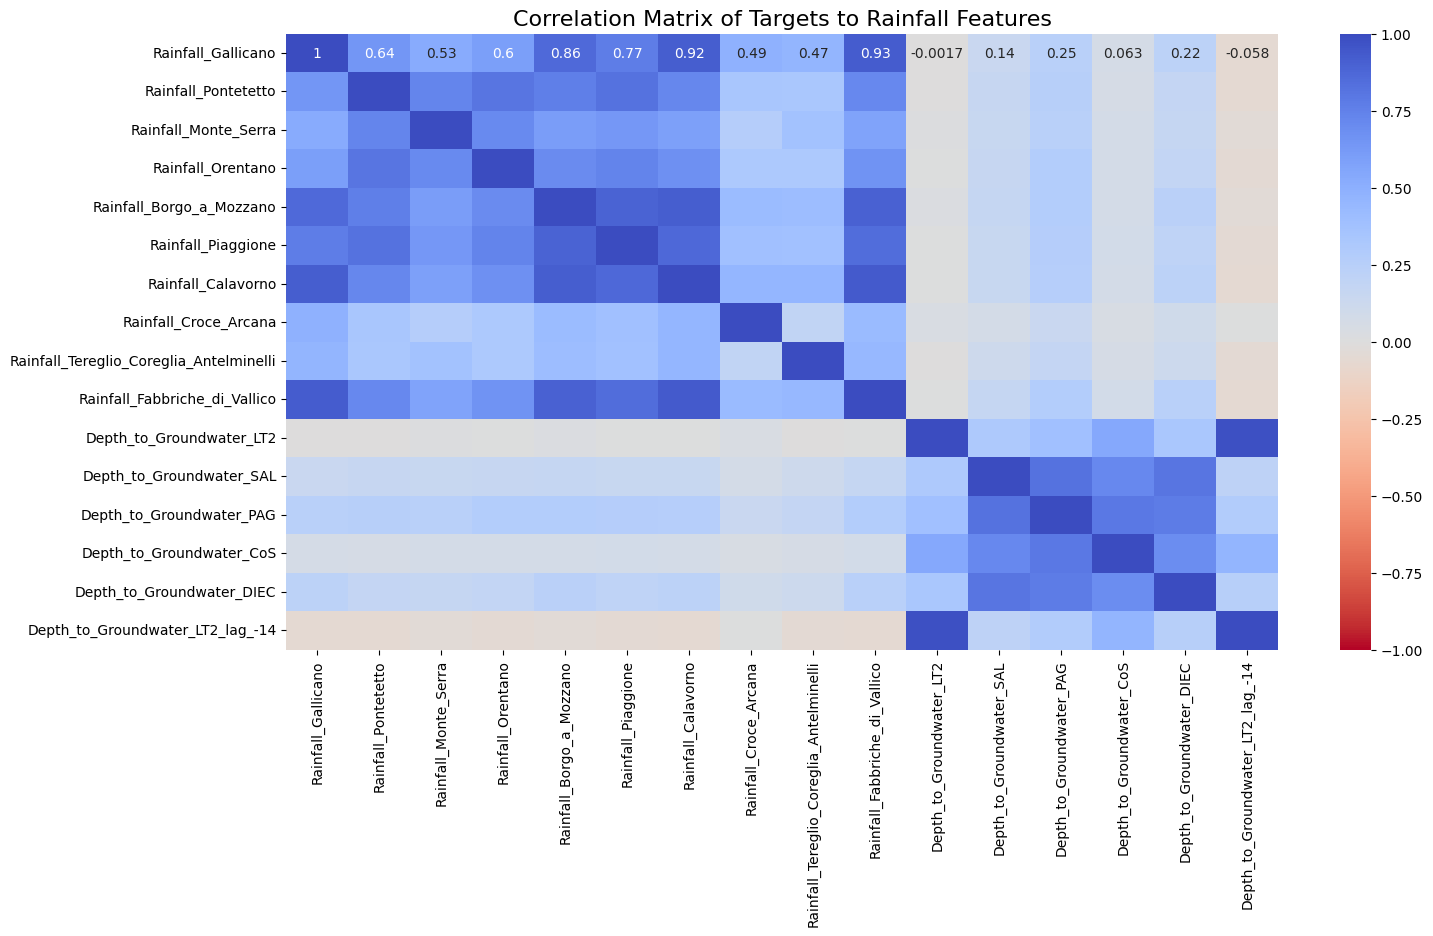

In [23]:
# Assuming aq_auser and core_columns are defined somewhere above this snippet.
core_columns = ['Depth', 'Rainfall']

# Select columns based on them containing the prefixes identified in 'core_columns'
selected_columns = [col for col in aq_auser.columns if any(col.startswith(prefix) for prefix in core_columns)]

f, ax = plt.subplots(figsize=(16, 8))  # Corrected for a single subplot

# Calculate correlation matrix for the selected columns
corrmat = aq_auser[selected_columns].corr()

# Plot the correlation matrix
sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax)
ax.set_title('Correlation Matrix of Targets to Rainfall Features', fontsize=16)

In [24]:
#aq_auser.columns

In [25]:
#clean up columns 
target_column = ['_lag_0', '_lag_-7', '_lag_7', '_lag_21'] 

# Identify columns to drop by checking if their names end with any value in target_column
columns_to_drop = [col for col in aq_auser.columns if any(col.endswith(suffix) for suffix in target_column)]

# Drop these columns from the DataFrame
aq_auser.drop(columns=columns_to_drop, inplace=True)

#check task
aq_auser.columns

Index(['Rainfall_Gallicano', 'Rainfall_Pontetetto', 'Rainfall_Monte_Serra',
       'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano', 'Rainfall_Piaggione',
       'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico', 'Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione',
       'Depth_to_Groundwater_LT2_lag_-14'],
      dtype='object')

## 5.3 Correlation of Target Variables vs Feature in Group - Temperature 

Text(0.5, 1.0, 'Correlation Matrix of Targets to Temperature Features')

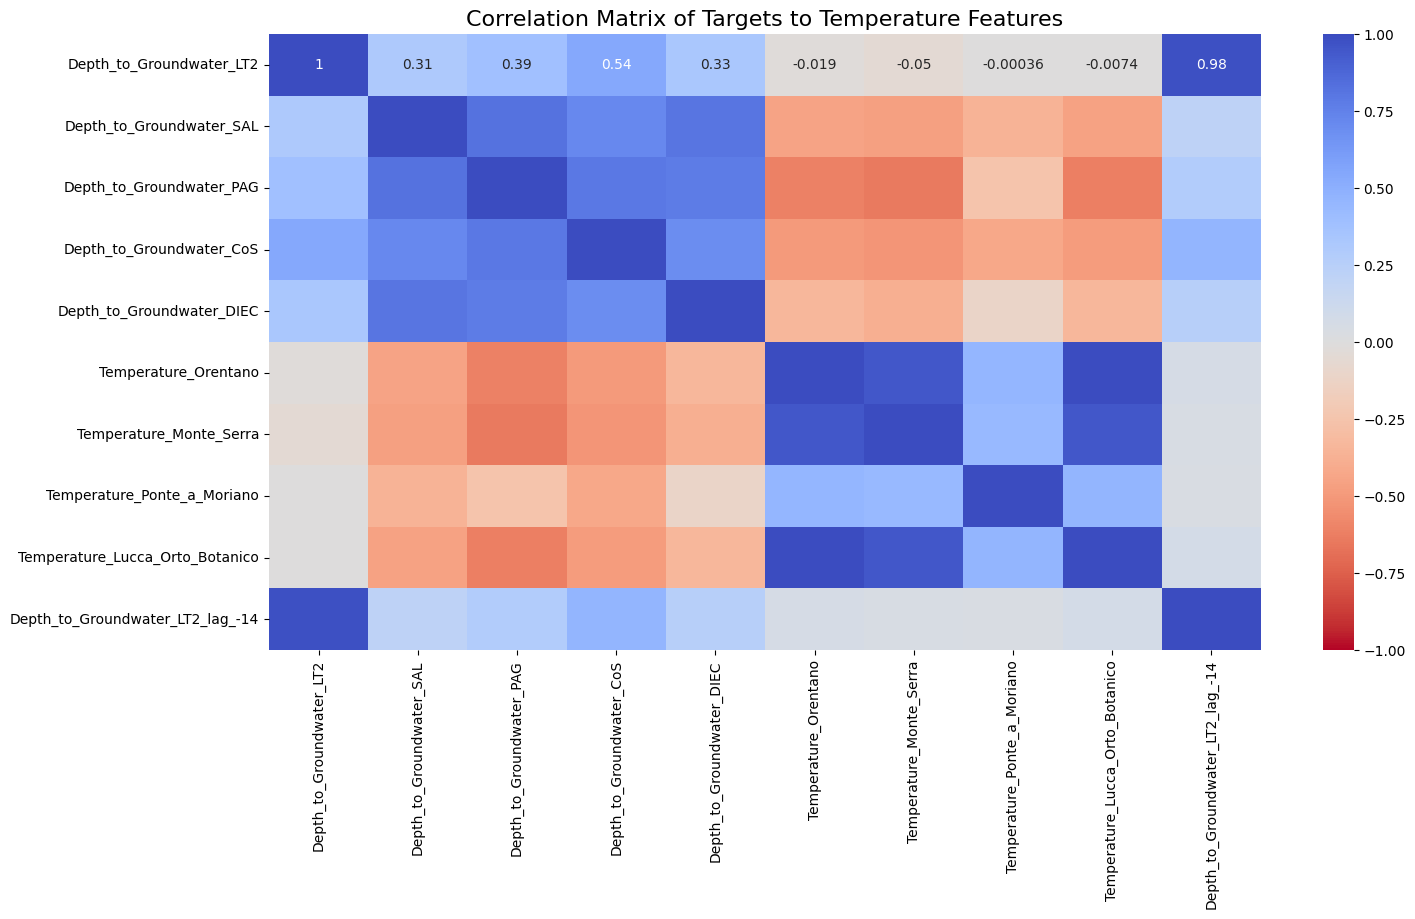

In [26]:
# Assuming aq_auser and core_columns are defined somewhere above this snippet.
core_columns = ['Depth', 'Temperature']

# Select columns based on them containing the values in 'core_columns' anywhere in their names
selected_columns = [col for col in aq_auser.columns if any(core_val in col for core_val in core_columns)]

f, ax = plt.subplots(figsize=(16, 8))  # Adjusted for a single subplot

# Calculate correlation matrix for the selected columns
corrmat = aq_auser[selected_columns].corr()

# Plot the correlation matrix
sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax)
ax.set_title('Correlation Matrix of Targets to Temperature Features', fontsize=16)

## 5.4 Correlation of Target Variables vs Feature in Group - Volume

Text(0.5, 1.0, 'Correlation Matrix of Targets to Volume Features')

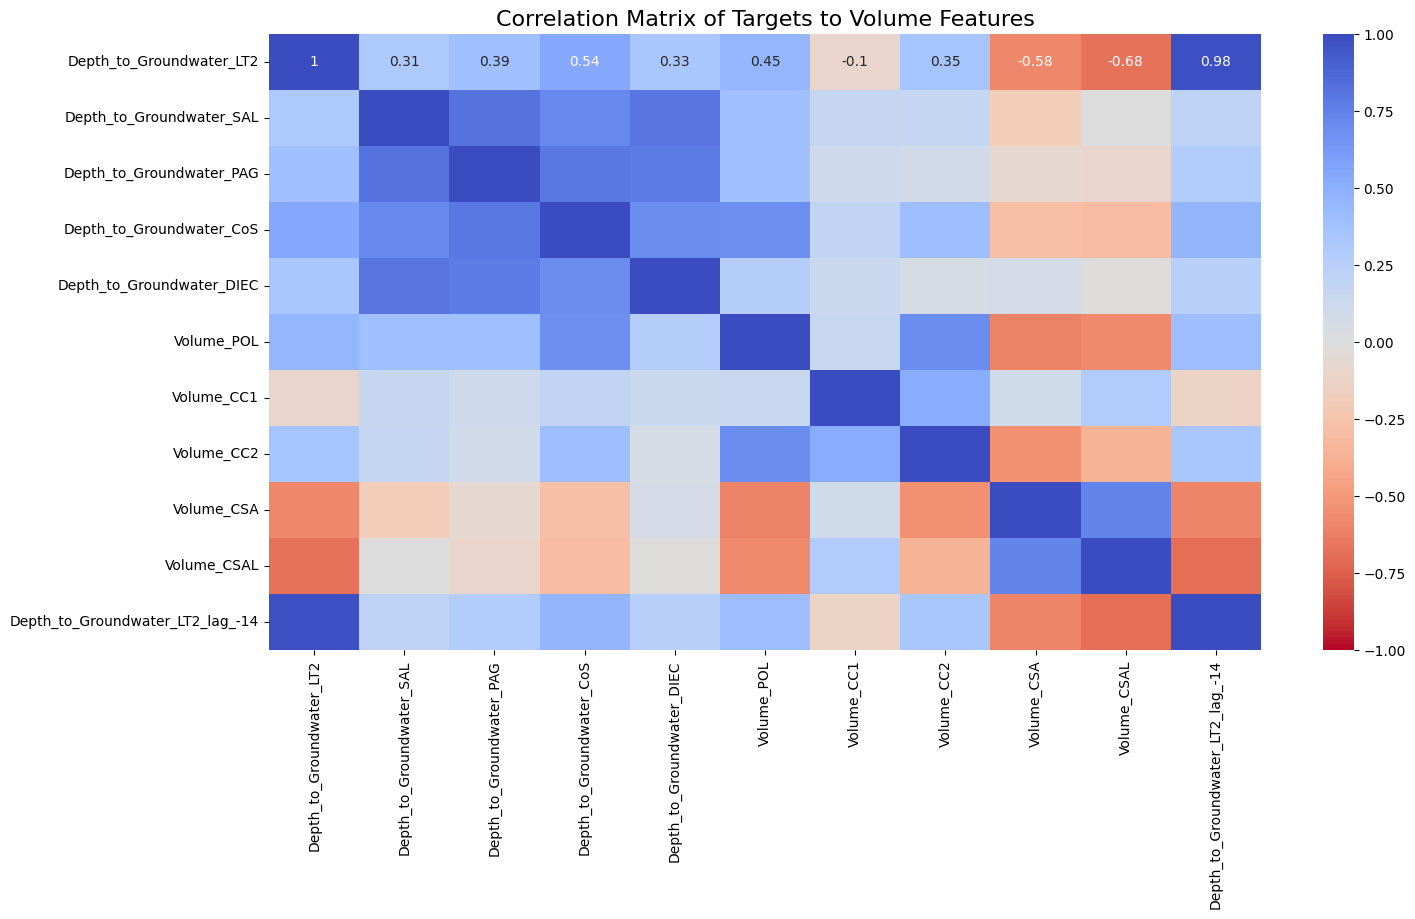

In [27]:
# Assuming aq_auser and core_columns are defined somewhere above this snippet.
core_columns = ['Depth', 'Volume']

# Select columns based on them containing the values in 'core_columns' anywhere in their names
selected_columns = [col for col in aq_auser.columns if any(core_val in col for core_val in core_columns)]

f, ax = plt.subplots(figsize=(16, 8))  # Adjusted for a single subplot

# Calculate correlation matrix for the selected columns
corrmat = aq_auser[selected_columns].corr()

# Plot the correlation matrix
sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax)
ax.set_title('Correlation Matrix of Targets to Volume Features', fontsize=16)

## 5.5 Correlation of Target Variables vs Feature in Group - Hydrometry

Text(0.5, 1.0, 'Correlation Matrix of Targets to Hydrometry Features')

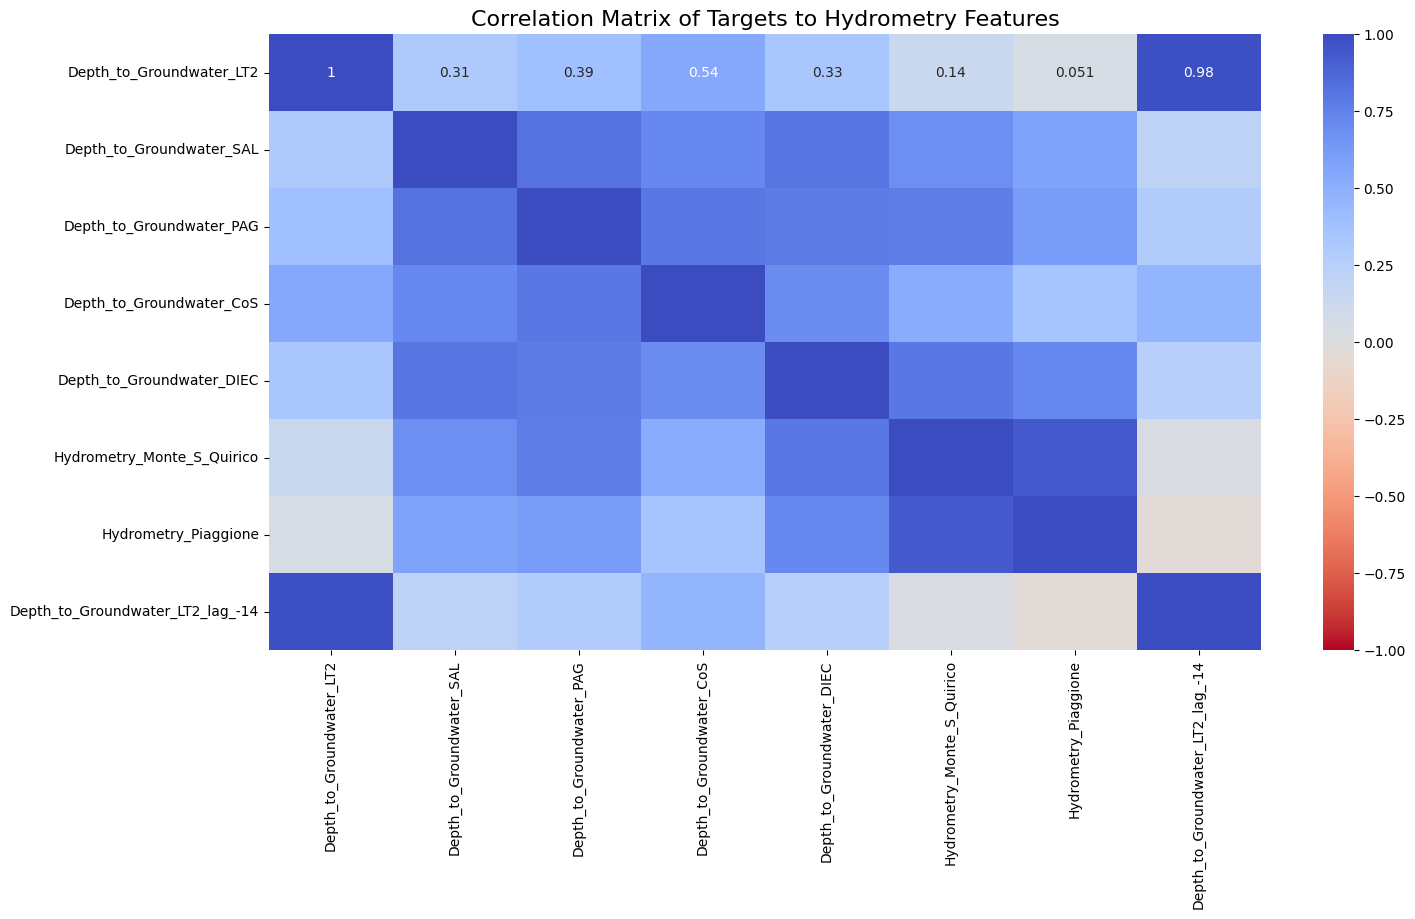

In [28]:
# Assuming aq_auser and core_columns are defined somewhere above this snippet.
core_columns = ['Depth', 'Hydrometry']

# Select columns based on them containing the values in 'core_columns' anywhere in their names
selected_columns = [col for col in aq_auser.columns if any(core_val in col for core_val in core_columns)]

f, ax = plt.subplots(figsize=(16, 8))  # Adjusted for a single subplot

# Calculate correlation matrix for the selected columns
corrmat = aq_auser[selected_columns].corr()

# Plot the correlation matrix
sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax)
ax.set_title('Correlation Matrix of Targets to Hydrometry Features', fontsize=16)

In [29]:
#aq_auser.columns

## 6. Feature Engineering

We have three options to consider for the feature groups: Create a sum, average or keep features separate.

### Criteria for Sum, Average, or Keeping Separate

- **Sum**: If the target variables represent parts of a whole (e.g., sales in different regions contributing to total sales), summing can provide a comprehensive view.
  
- **Average**: Use averaging if you're interested in central tendencies or need to normalize variables that are on different scales. Averages can also be useful for creating indices or composite metrics.

- **Keeping Separate**: Maintain separate targets if:
  - The variables serve different analytical or operational purposes.
  - The relationship between the variables is weak or non-linear, and combining them could obscure important nuances.
  - Model performance for individual targets is significantly better than for any combined approach.
 roach.

### 6.1 Overall Trend for Depth to Groundwater (Targets)
Since we are interested in the overall trend for this aquifer we will average the target variables.

In [32]:
#aq_auser.info()

In [33]:
# create an average of selected Depth Columns 

import pandas as pd

def create_average_feature(df, prefix, exclude_suffix=None):
    """
    Creates an average feature in the DataFrame based on specified prefix and excluding columns with specified suffix.
    If exclude_suffix is None, no columns will be excluded based on suffix.
    """
    # Filter columns based on the specified conditions, adjust for None exclude_suffix
    filtered_columns = [col for col in df.columns if col.startswith(prefix) and (exclude_suffix is None or not col.endswith(exclude_suffix))]
    
    # Calculate the average of the filtered columns and add as a new column
    avg_column_name = f"{prefix}_avg"
    df[avg_column_name] = df[filtered_columns].mean(axis=1)
    
    return df


# Assuming 'aq_auser' is your DataFrame
# This will include all columns starting with 'Depth', as exclude_suffix is None
aq_auser = create_average_feature(aq_auser, 'Depth', '_Lag_-14')

### 6.2 Overall trend for Core features except Volume
For all but the volume features, we will also calculate the average to evaluate the overall trend by feature group for this aquifer.

In [34]:
# Create averages for select features
aq_auser = create_average_feature(aq_auser, 'Temperature', None)
aq_auser = create_average_feature(aq_auser, 'Rainfall', None)
aq_auser = create_average_feature(aq_auser, 'Hydrometry', None)
#aq_auser.head(2)

### 6.3 Sum the Volume features
We will sum the volume feature since the total volume removed would likely have a significant impact on the water level for this feature group.

In [36]:
# create sums for Volume Columns

# Sum all columns with prefix "Volume"
volume_columns = [col for col in aq_auser.columns if col.startswith('Volume')]
aq_auser['Volume_sum'] = aq_auser[volume_columns].sum(axis=1)

aq_auser_sum = aq_auser.copy()
#aq_auser_sum.head(2)
print("Created Sum for Volume features.")

Created Sum for Volume features.


## 7. Resampling to extract more information

Lets explore resampling to see if makes sense.

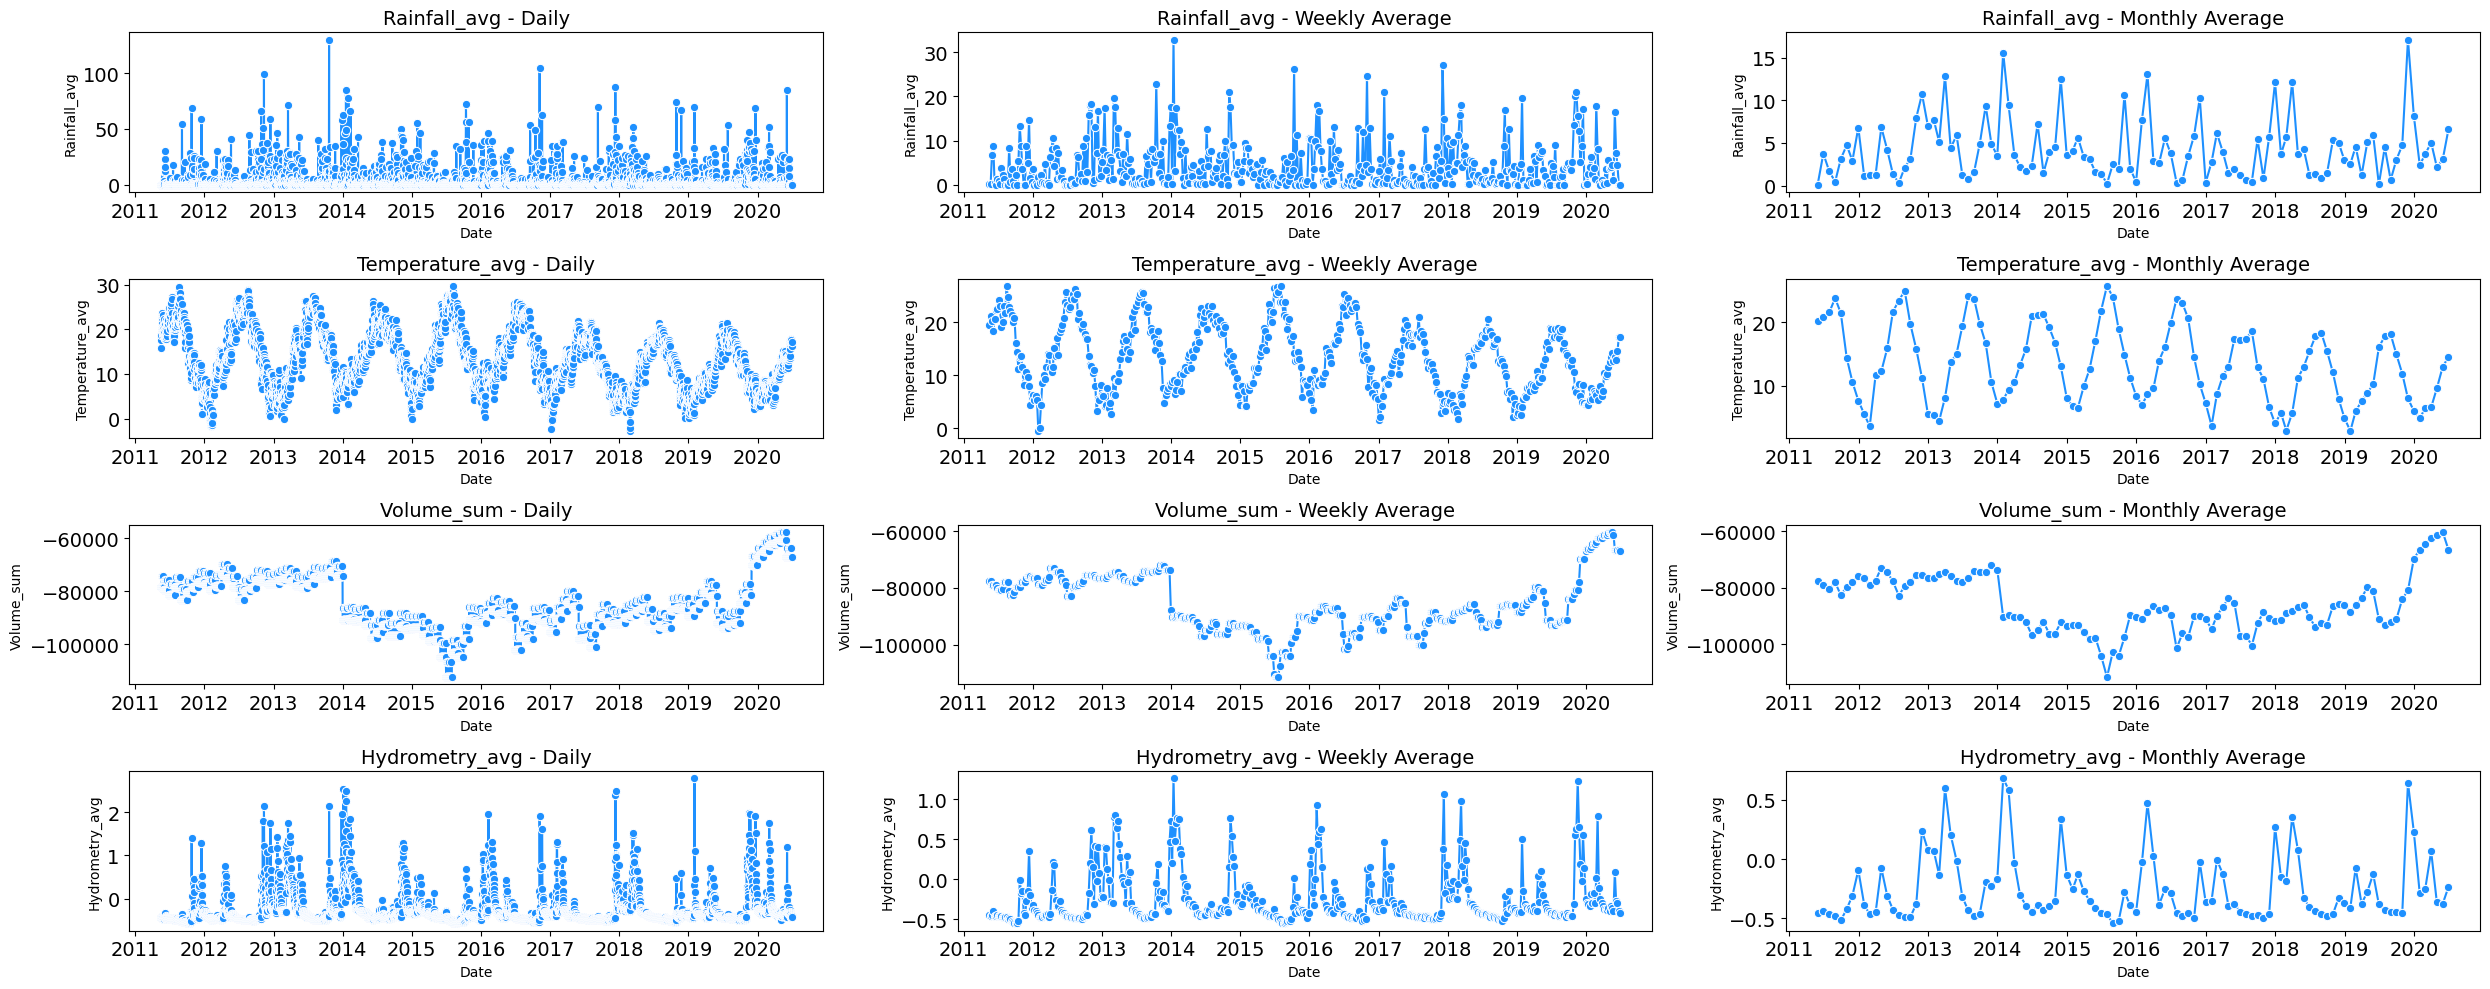

In [37]:
# Apply resampling to Smooth data and extract additional information.

columns_to_plot = ['Rainfall_avg', 'Temperature_avg', 'Volume_sum', 'Hydrometry_avg']

# Setup the figure and axes for a 4x3 grid
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(25, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, column in enumerate(columns_to_plot):
    # Daily averages plot (original data)
    sns.lineplot(ax=axs[i, 0], x=aq_auser.index, y=aq_auser[column], marker='o', color='dodgerblue')
    axs[i, 0].set_title(f'{column} - Daily', fontsize=14)
    axs[i, 0].tick_params(labelsize=14)
    
    # Weekly averages plot
    weekly_resampled = aq_auser[column].resample('7D').mean()
    sns.lineplot(ax=axs[i, 1], data=weekly_resampled, marker='o', color='dodgerblue')
    axs[i, 1].set_title(f'{column} - Weekly Average', fontsize=14)
    axs[i, 1].tick_params(labelsize=14)
    
    # Monthly averages plot
    monthly_resampled = aq_auser[column].resample('M').mean()
    sns.lineplot(ax=axs[i, 2], data=monthly_resampled, marker='o', color='dodgerblue')
    axs[i, 2].set_title(f'{column} - Monthly Average', fontsize=14)
    axs[i, 2].tick_params(labelsize=14)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

It does not seem to make a significant difference between sampling daily and weekly. Monthly sampling would smoothen out the variation but this may risk losing information so we will keep the daily sampling for this data set.

## 8. Here we will explore Stationarity in features for a time series   

Going with Average of Depth_Ground Water.

- What is the trend?
- What about Seasonality?
- Explore Variability, Outliers, and inflection Points

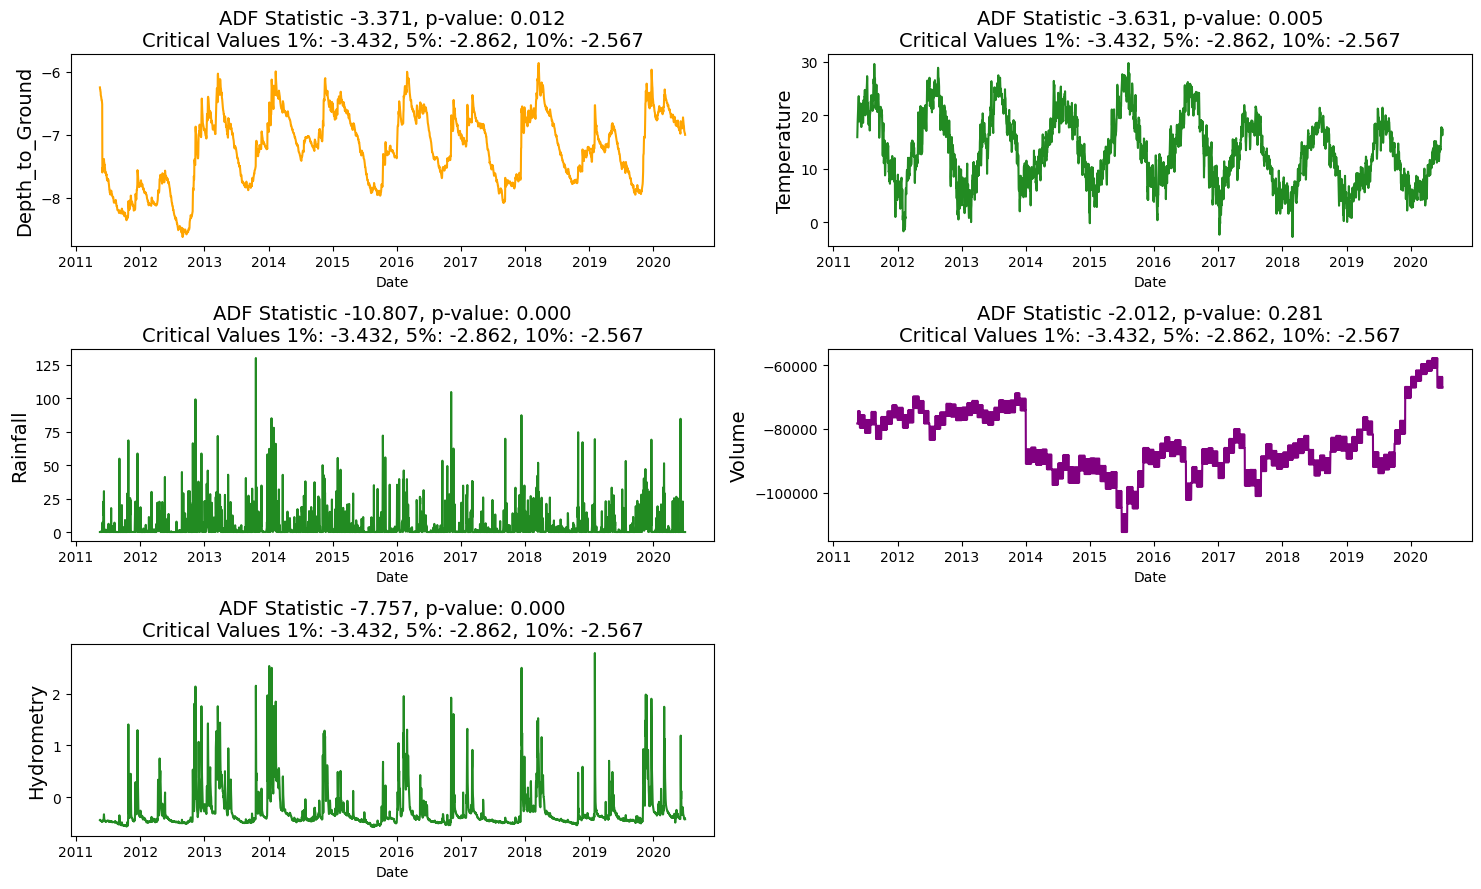

In [38]:
from statsmodels.tsa.stattools import adfuller

# Thanks to https://www.kaggle.com/iamleonie for this function!

# Adjusted function to use 'auser_avg' DataFrame where 'date' column is the index
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=series.index, y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

# Assuming 'auser_avg' has these columns and the 'date' is its index
visualize_adfuller_results(aq_auser['Depth_avg'], 'Depth_to_Ground', ax[0, 0])
visualize_adfuller_results(aq_auser['Rainfall_avg'], 'Rainfall', ax[1, 0])
visualize_adfuller_results(aq_auser['Temperature_avg'], 'Temperature', ax[0, 1])
visualize_adfuller_results(aq_auser['Volume_sum'], 'Volume', ax[1, 1])
visualize_adfuller_results(aq_auser['Hydrometry_avg'], 'Hydrometry', ax[2, 0])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

#### Although the target features showed yellow they technically pass the .050 value for stationarity. More on this later. However, let's explore the Volume average as it did not appear stationary.

### 8.1 Transformating the Volume Data

<Axes: xlabel='Volume_sum_log', ylabel='Density'>

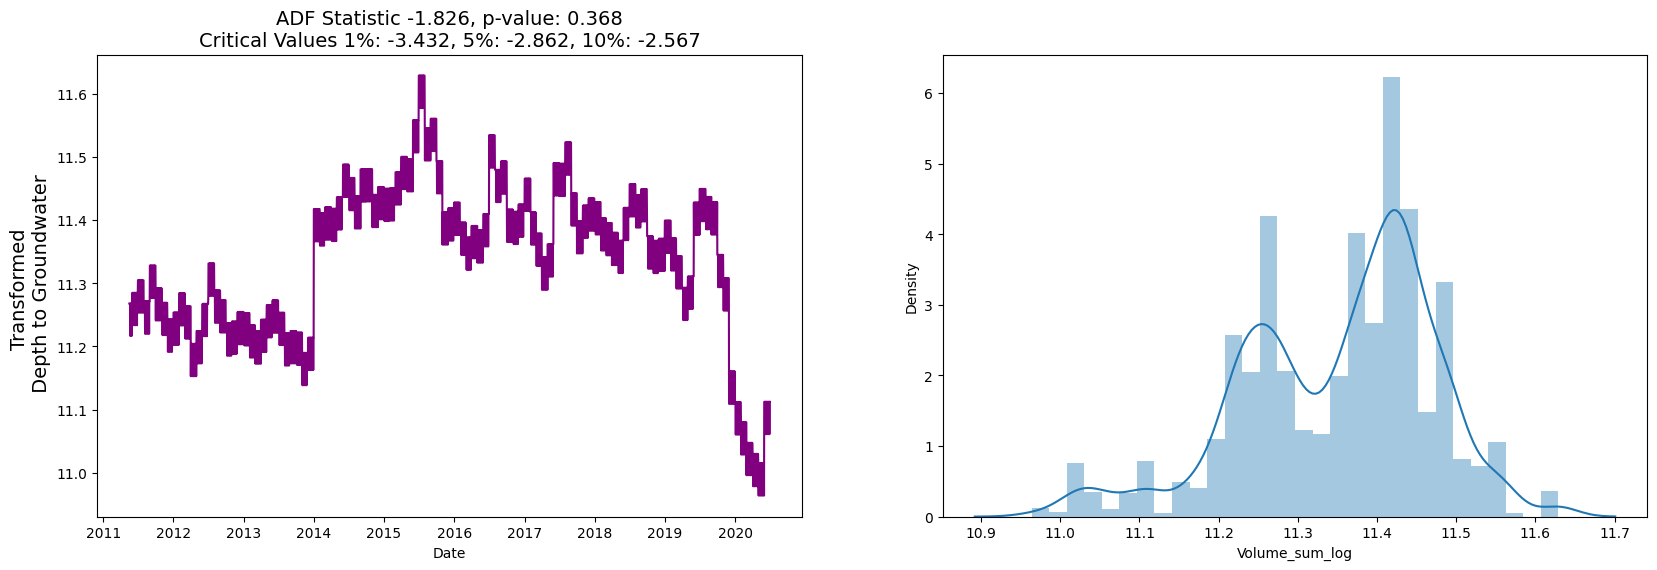

In [39]:
# Log Transform of absolute values
# (Log transoform of negative values will return NaN)
aq_auser['Volume_sum_log'] =  np.log(abs(aq_auser['Volume_sum']))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(aq_auser['Volume_sum_log'], 'Transformed \n Depth to Groundwater', ax[0])

sns.distplot(aq_auser['Volume_sum_log'], ax=ax[1])

### 8.2 Using Differencing on the Volume Data

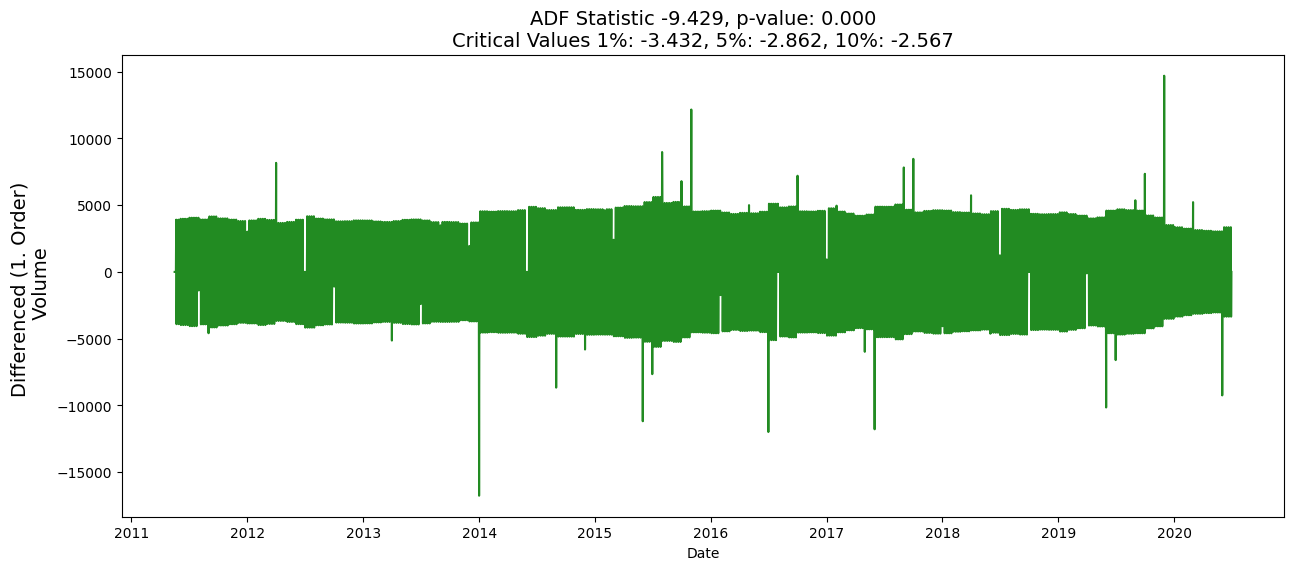

In [41]:
# First Order Differencing
auser_diff = np.diff(aq_auser['Volume_sum'])
aq_auser['Volume_sum_diff_1'] = np.append([0], auser_diff)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(aq_auser['Volume_sum_diff_1'], 'Differenced (1. Order) \n Volume', ax)

It appears that differencing has achieve stationarity for the Volume data.

## 9. Time Series Decomposition

* **Trend**: The underlying trend in the data over a long period, ignoring short-term fluctuations.
* **Seasonality**: The repeating patterns or cycles observed in the data at regular intervals, such as daily, monthly, or yearly
* **Residual**: what remains after the trend and seasonal components have been removed from the original time series. It represents the noise or random variation in the data that cannot be attributed to the systematic trend or seasonal patterns.

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  ['Depth_avg','Rainfall_avg', 'Temperature_avg', 
                 'Volume_sum', 'Hydrometry_avg']

for column in core_columns:
    decomp = seasonal_decompose(aq_auser[column], period=52, model='additive', extrapolate_trend='freq')
    aq_auser[f"{column}_trend"] = decomp.trend
    aq_auser[f"{column}_seasonal"] = decomp.seasonal
    
print('Decomposition completed successfully.')

Decomposition completed successfully.


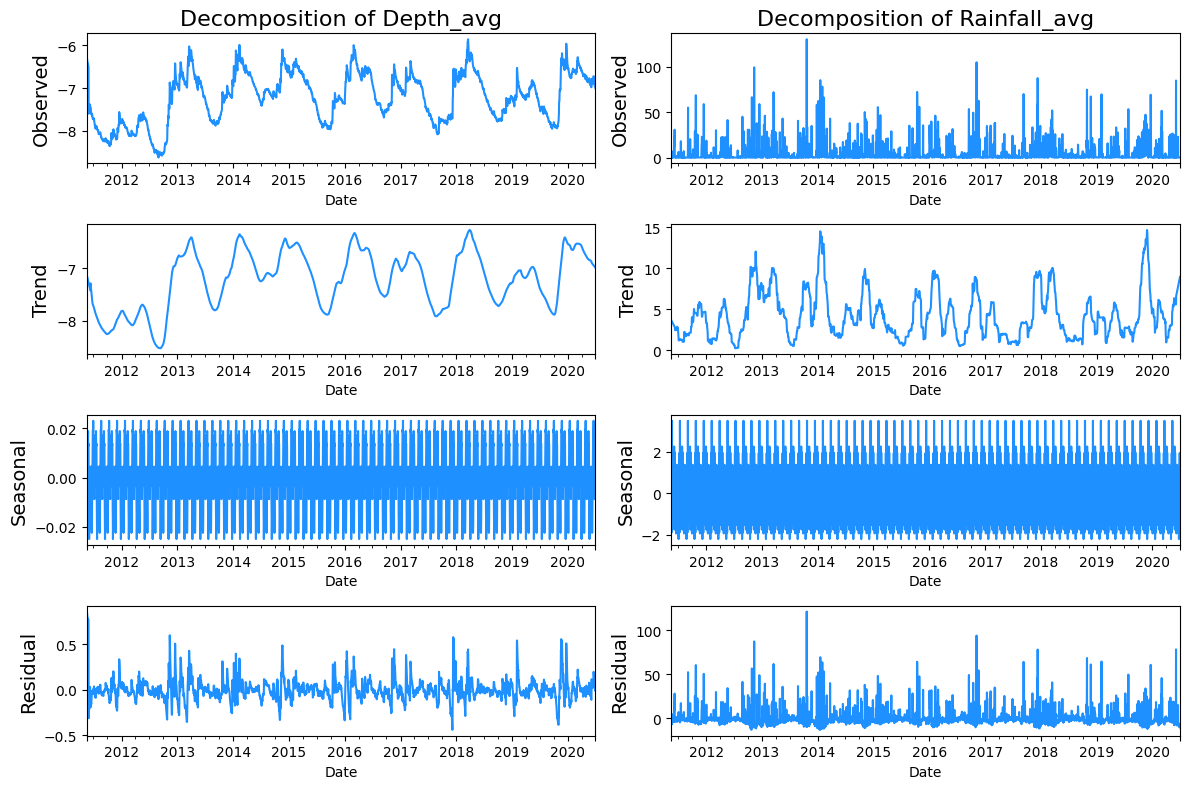

In [43]:
def plot_decomposition(df, columns=None, period=52, model='additive'):
    """
    Plots the observed, trend, seasonal, and residual components of specified columns in a DataFrame.

    Parameters:
    - df: DataFrame containing the time series data.
    - columns: List of column names to decompose. If None, decomposes the first two columns.
    - period: The period of the seasonal component. Defaults to 52.
    - model: Type of decomposition model ('additive' or 'multiplicative'). Defaults to 'additive'.
    """
    if columns is None:
        # If no columns are specified, use the first two columns of the DataFrame
        columns = df.columns[:2]
    elif isinstance(columns, str):
        # If a single column name is provided, wrap it in a list
        columns = [columns]
    
    # Create a figure with 4 rows and as many columns as there are time series to decompose
    fig, ax = plt.subplots(4, len(columns), figsize=(12, 8))
    
    for i, column in enumerate(columns):
        # Decompose the time series
        res = seasonal_decompose(df[column], period=period, model=model, extrapolate_trend='freq')
        
        # Plot each component
        ax[0, i].set_title(f'Decomposition of {column}', fontsize=16)
        res.observed.plot(ax=ax[0, i], legend=False, color='dodgerblue')
        ax[0, i].set_ylabel('Observed', fontsize=14)

        res.trend.plot(ax=ax[1, i], legend=False, color='dodgerblue')
        ax[1, i].set_ylabel('Trend', fontsize=14)

        res.seasonal.plot(ax=ax[2, i], legend=False, color='dodgerblue')
        ax[2, i].set_ylabel('Seasonal', fontsize=14)
        
        res.resid.plot(ax=ax[3, i], legend=False, color='dodgerblue')
        ax[3, i].set_ylabel('Residual', fontsize=14)

    plt.tight_layout()
    plt.show()

# Example usage:
plot_decomposition(aq_auser, ['Depth_avg', 'Rainfall_avg'])


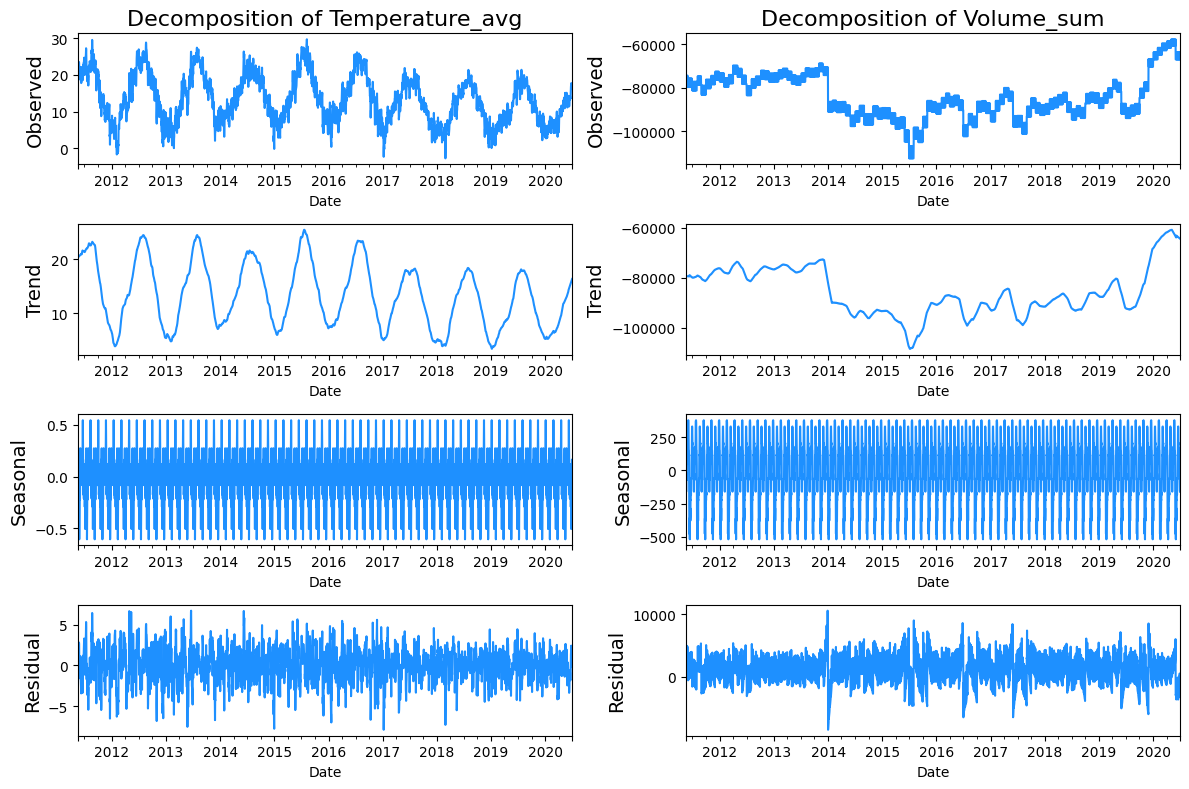

In [44]:
plot_decomposition(aq_auser, ['Temperature_avg', 'Volume_sum'])

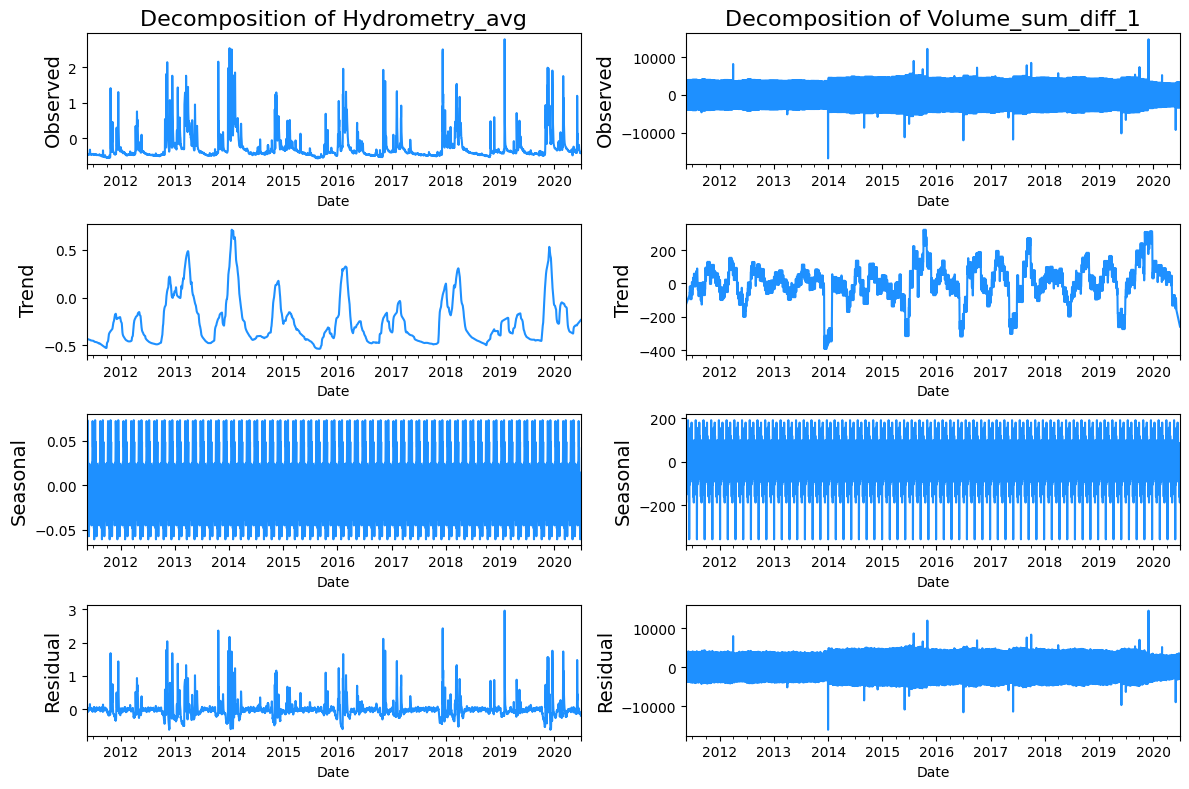

In [45]:
plot_decomposition(aq_auser, ['Hydrometry_avg', 'Volume_sum_diff_1'])

### 9.1 Exploring Seasonality

In [46]:
#auser_eda.head(2)

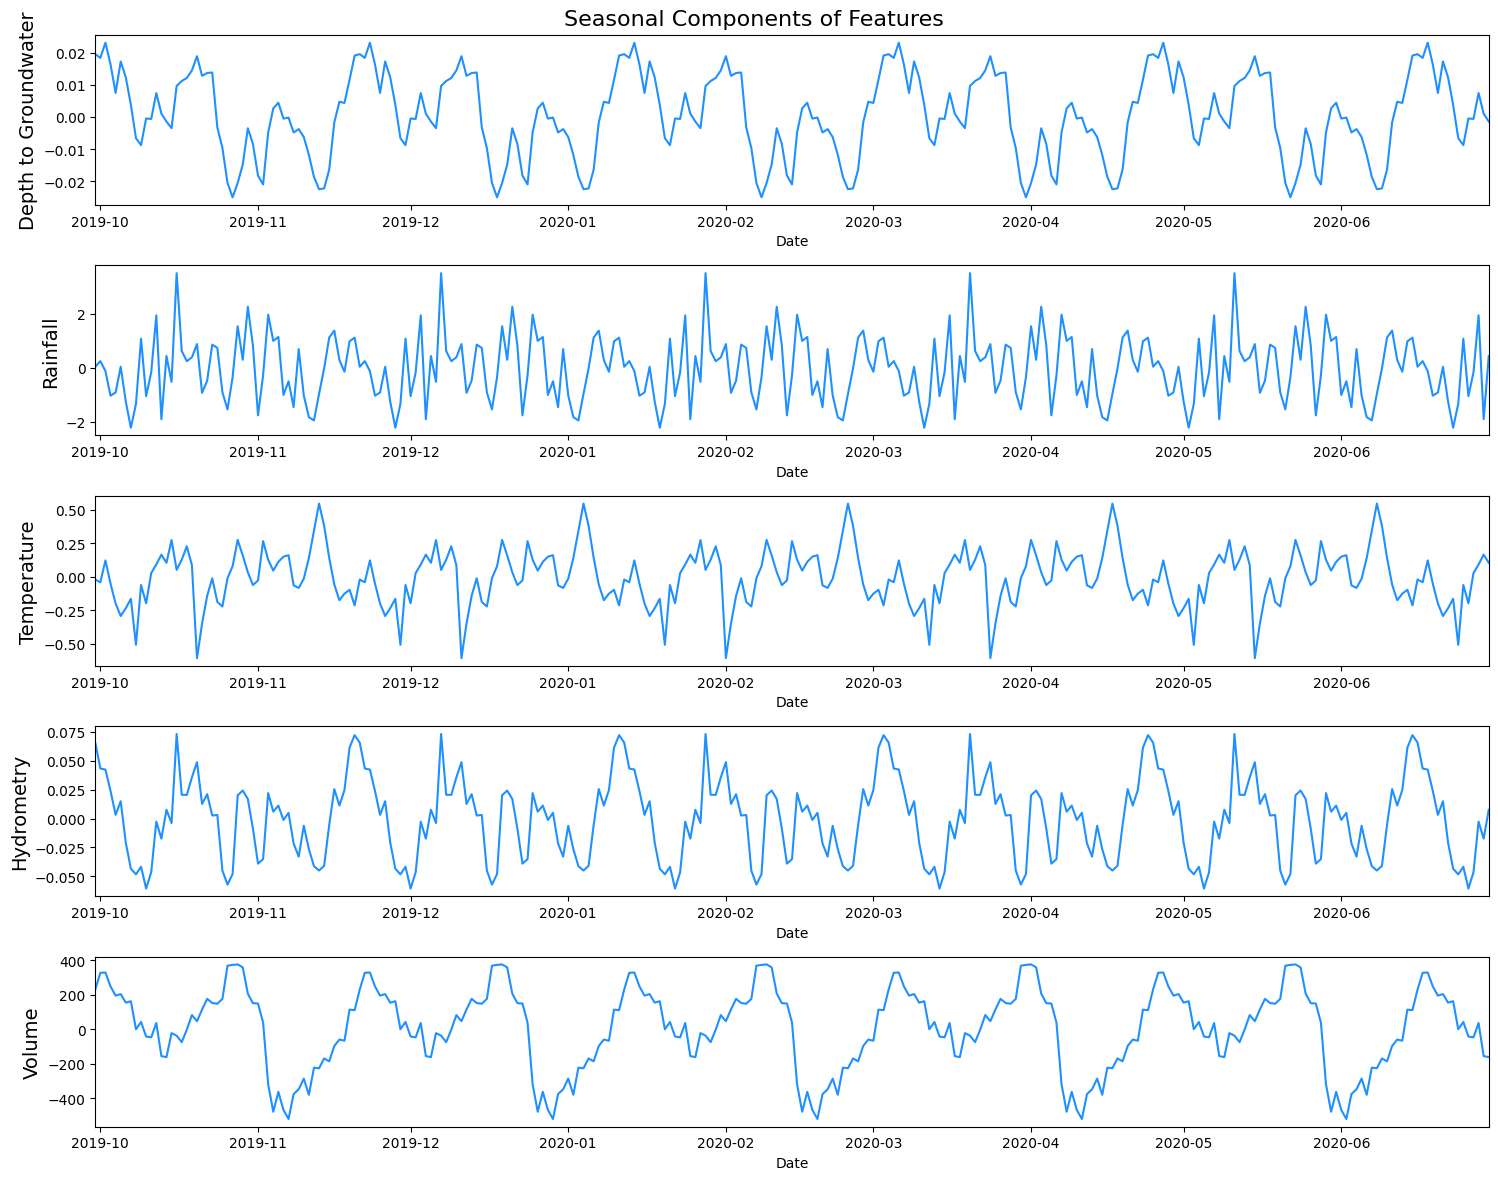

In [47]:
# Assuming 'auser_eda' is your DataFrame and it's already defined
from datetime import date

# Define the columns and their corresponding labels in a list of tuples
seasonal_components = [
    ('Depth_avg_seasonal', 'Depth to Groundwater'),
    ('Rainfall_avg_seasonal', 'Rainfall'),
    ('Temperature_avg_seasonal', 'Temperature'),
    ('Hydrometry_avg_seasonal', 'Hydrometry'),
    ('Volume_sum_seasonal', 'Volume')
]

# Create subplots
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)

# Loop through each component to plot
for i, (component, label) in enumerate(seasonal_components):
    sns.lineplot(x=aq_auser.index, y=aq_auser[component], ax=ax[i], color='dodgerblue')
    ax[i].set_ylabel(label, fontsize=14)
    ax[i].set_xlim([date(2019, 9, 30), date(2020, 6, 30)])  # Adjusted to the correct date range

plt.tight_layout()
plt.show()


Seems like many of the features are varying on a similar trend of about every 2 months

### 9.2 Lag - How do certain feature groups compare to the Target average for Depth to Groundwater?

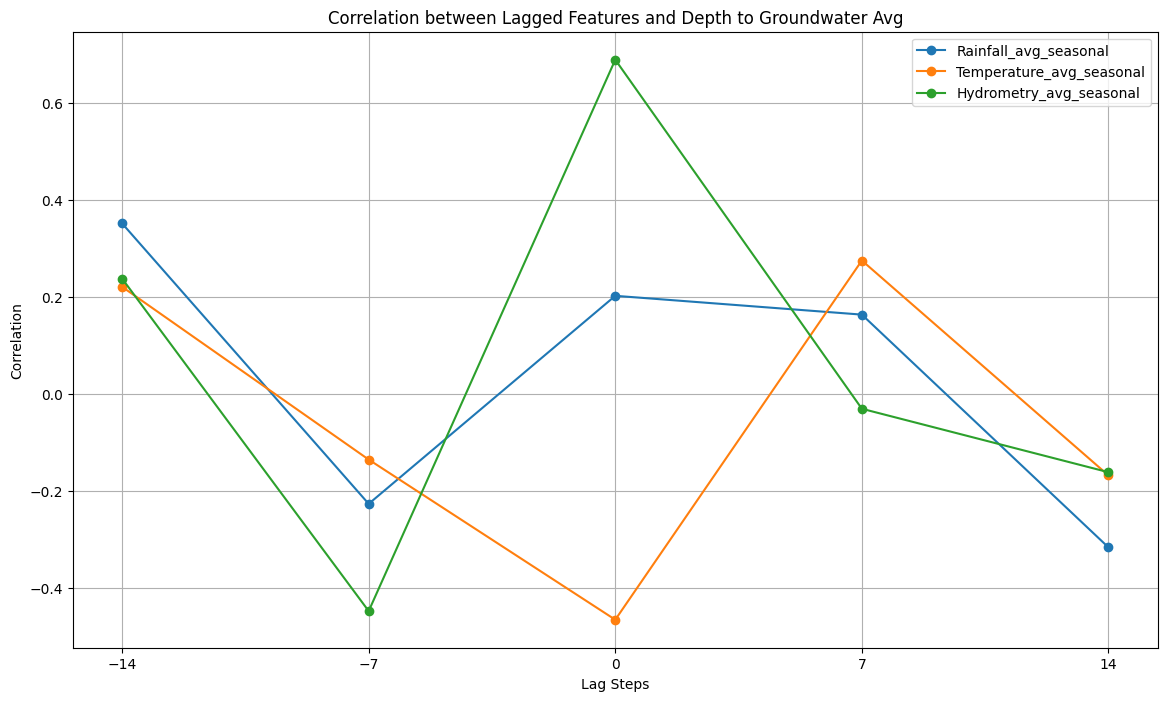

In [48]:
# Assuming aq_auser_avg is your DataFrame and 'target_column' is your target
core_columns = ['Rainfall_avg_seasonal', 'Temperature_avg_seasonal', 'Hydrometry_avg_seasonal']
num_lags = [-14, -7, 0, 7, 14]  # List of lag values to iterate through

# Dictionary to store correlation results for plotting
correlation_results = {column: [] for column in core_columns}

for column in core_columns:
    for lag in num_lags:
        # Creating a new lagged column for the current column and lag value
        lagged_column_name = f'{column}_lag_{lag}'
        aq_auser[lagged_column_name] = aq_auser[column].shift(lag)
        
        # Calculating correlation with the target feature
        correlation = aq_auser[[lagged_column_name, 'Depth_avg_seasonal']].corr().iloc[0, 1]
        correlation_results[column].append((lag, correlation))
        
        # Optional: print the correlation for the current column and lag
        #print(f'Column: {column}, Lag: {lag}, Correlation: {correlation}')

# Plotting
plt.figure(figsize=(14, 8))
for column, correlations in correlation_results.items():
    lags, corrs = zip(*correlations)  # Unzipping the lag values and their corresponding correlations
    plt.plot(lags, corrs, marker='o', label=f'{column}')

plt.title('Correlation between Lagged Features and Depth to Groundwater Avg')
plt.xlabel('Lag Steps')
plt.ylabel('Correlation')
plt.xticks(num_lags)
plt.legend()
plt.grid(True)
plt.show()

It seems that creating laging features to align with seasonality does improve the correlation between the features and target variable seasonal values.

### 9.3 Autocorrelation Analysis 
* **Autocorrelation Function (ACF)**: P helps adjust the line that is being fitted to forecast the series. P corresponds with MA parameter
* **Partial Autocorrelation Function (PACF)**: D = In an ARIMA model we transform a time series into stationary one(series without trend or seasonality) using differencing. D refers to the number of differencing transformations required by the time series to get stationary. D corresponds with AR parameter.

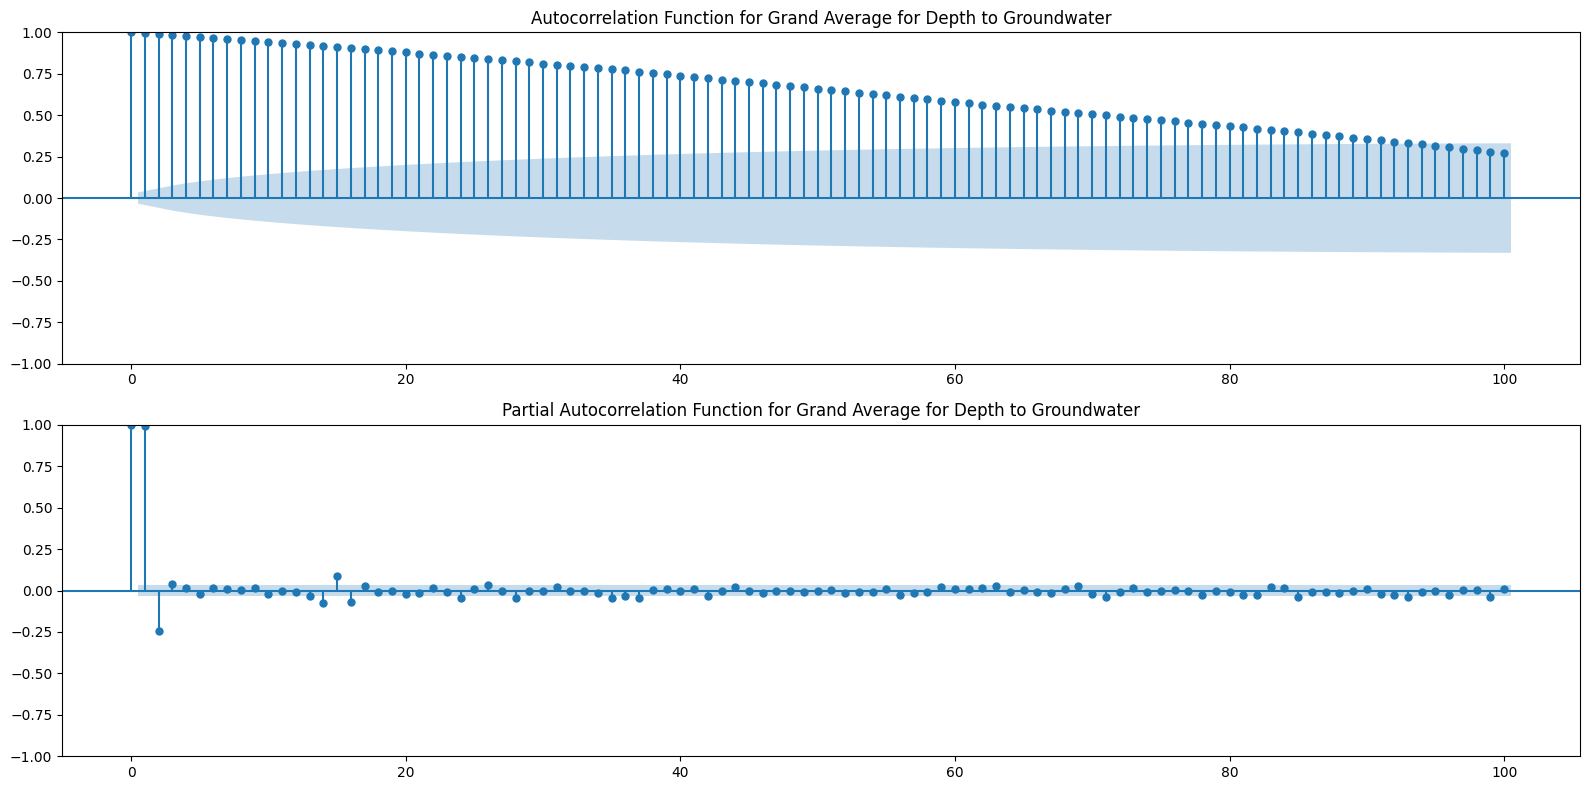

In [63]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

#Assuming 'aq_auser' is a DataFrame with your data
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(aq_auser['Depth_avg'], lags=100, ax=ax[0])
ax[0].set_title('Autocorrelation Function for Grand Average for Depth to Groundwater')

plot_pacf(aq_auser['Depth_avg'], lags=100, ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function for Grand Average for Depth to Groundwater')

plt.tight_layout()  # Adjust layout to not overlap
plt.show()

Seems like this data set has a high overall autocorrelation that decreases over time.  Specifically, values beyond the 91st previous day have no significant predictive power on the grand average depth to groundwater measurements.

### 10. Creation of Train and Test Sets and saving file to csv 

It seems like we are ready to create the train and test sets to build models and make predictions

In [73]:
# extract relevant columns
def extract_target_columns(df):
    try:
        # Extracting specific columns
        target_columns = ['Depth_avg', 'DepthN_avg', 'Depth_to_Groundwater_LT2', 'Rainfall_avg', 
                          'Temperature_avg', 'Volume_sum_diff_1', 'Hydrometry_avg' ]
        auser_ttset = aq_auser[target_columns].copy()
        
        print("Target columns extracted successfully.")
        
        return auser_ttset
    except KeyError as e:
        print(f"Error: One or more specified columns not found in the DataFrame: {e}")
        return None
    except Exception as e:
        print(f"Error occurred during column extraction: {e}")
        return None

# Replace it with your actual DataFrame name
# Replace it with your actual index name and data type
auser_ttset = extract_target_columns(aq_auser)

Target columns extracted successfully.


In [74]:
#Clean up the names
def rename_columns(df):
    try:
        # Renaming specified columns
        df.rename(columns={'Depth_to_Groundwater_LT2': 'Depth_South',
                           'Volume_sum_diff_1': 'Volume_tot_df1'}, inplace=True)
        
        print("Columns renamed successfully.")
    except KeyError as e:
        print(f"Error: One or more specified columns not found in the DataFrame: {e}")
    except Exception as e:
        print(f"Error occurred during column renaming: {e}")
rename_columns(auser_ttset)
auser_ttset.head(3)

Columns renamed successfully.


Depth_avg  DepthN_avg  Depth_South  Rainfall_avg  Temperature_avg  \
Date                                                                            
2011-05-17      -6.25       -4.57       -12.97          0.00            15.88   
2011-05-18      -6.28       -4.62       -12.93          0.00            17.61   
2011-05-19      -6.28       -4.62       -12.92          0.00            18.66   

            Volume_tot_df1  Hydrometry_avg  
Date                                        
2011-05-17            0.00           -0.43  
2011-05-18            0.00           -0.43  
2011-05-19            0.00           -0.44

In [75]:
#Save the data frame for test / train split
# Reset the index to turn the 'Date' index into a column
auser_ttset.reset_index(inplace=True)

# Specify just the file name
file_name = 'auser_ttset.csv'

# Save the DataFrame to a CSV file in the current directory
auser_ttset.to_csv(file_name, index=False)
print('File copied sucessfully.')

File copied sucessfully.


In [76]:
#auser_ttset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             3333 non-null   datetime64[ns]
 1   Depth_avg        3333 non-null   float64       
 2   DepthN_avg       3333 non-null   float64       
 3   Depth_South      3333 non-null   float64       
 4   Rainfall_avg     3333 non-null   float64       
 5   Temperature_avg  3333 non-null   float64       
 6   Volume_tot_df1   3333 non-null   float64       
 7   Hydrometry_avg   3333 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 208.4 KB
